In [1]:
import pandas as pd
import matplotlib
import time
import matplotlib.pyplot as plt
import numpy as np
import plotnine as p9
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeatur
%matplotlib inline
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shapereader
import matplotlib.ticker as mticker
from matplotlib import font_manager

In [2]:
df=pd.read_csv("folder/各点多年平均_有经纬LAI.csv",encoding="gbk")

In [3]:
df

,Unnamed: 0,H_F_MDS,type,name,valid,LE_F_MDS,P_F,TA_F,SW_OUT,P_SUM,VPD_F,LW_IN_F,SW_IN_F,albedo,b,latitude,longitude,longitude_new,IGBP,LAI
0,0,68.095032,MF_S,AR-SLu,0.801865,39.510745,0.020445,19.572791,NaN,23.146222,13.529252,318.662882,207.502198,NaN,2.084899,-33.464800,-66.459800,293.540200,MF,0.640604
1,0,-18.943289,ENF_S,AR-Vir,0.808693,82.198975,0.082782,21.431613,NaN,97.251417,9.126853,365.041162,161.715166,NaN,-0.235940,-28.239500,-56.188600,303.811400,ENF,2.414140
2,0,-3.286018,GRA,AT-Neu,0.809954,16.211796,0.042371,5.827517,56.022692,49.006782,2.215954,288.201762,81.199449,0.364724,-1.561054,47.116670,11.317500,11.317500,GRA,1.511286
3,0,57.910279,WSA_S,AU-Ade,0.759979,50.406914,0.082257,26.914328,56.529799,92.218069,15.135291,403.007267,217.090602,0.139399,1.507399,-13.076900,131.117800,131.117800,WSA,1.153943
4,0,80.377196,SAV_S,AU-ASM,0.733468,21.789513,0.022501,22.446910,63.676331,25.369881,20.150878,348.683547,239.376965,0.133624,10.096540,-22.283000,133.249000,133.249000,SAV,0.338191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,26.092398,ENF,US-Wi9,0.809565,24.793146,0.042611,3.592561,NaN,50.403250,2.624575,289.848535,114.845075,NaN,1.016907,46.738514,-91.074644,268.925356,ENF,1.752076
201,0,46.103491,GRA,US-Wkg,0.809871,15.500204,0.016670,17.012913,78.566354,19.093944,14.512146,301.841748,203.219174,0.190489,4.397425,31.736500,-109.941900,250.058100,GRA,0.294075
202,0,7.035685,WET,US-WPT,0.809934,43.061990,0.051723,10.735540,39.918884,60.106056,3.883991,343.312107,113.156470,0.173277,0.200350,41.464639,-82.996157,277.003843,WET,0.759704
203,0,41.667899,SAV_S,ZA-Kru,0.809954,31.513582,0.027485,21.452664,48.637975,33.633255,10.202385,374.528566,160.116744,0.150566,2.460642,-25.019700,31.496900,31.496900,SAV,1.000877


In [4]:
MF=df[df['IGBP'].isin(['MF'])]
CRO=df[df['IGBP'].isin(['CRO'])]
OSH=df[df['IGBP'].isin(['OSH'])]
CSH=df[df['IGBP'].isin(['CSH'])]
DBF=df[df['IGBP'].isin(['DBF'])]
EBF=df[df['IGBP'].isin(['EBF'])]
ENF=df[df['IGBP'].isin(['ENF'])]
GRA=df[df['IGBP'].isin(['GRA'])]
WSA=df[df['IGBP'].isin(['WSA'])]
SAV=df[df['IGBP'].isin(['SAV'])]
WET=df[df['IGBP'].isin(['WET'])]
DNF=df[df['IGBP'].isin(['DNF'])]
SNO=df[df['IGBP'].isin(['SNO'])]

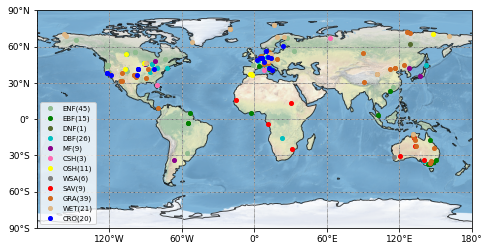

In [5]:
fig=plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.stock_img()
ax.coastlines(alpha=0.7)

# 标注坐标轴
ax.set_xticks([-120,-60,0,60,120,180], crs=ccrs.PlateCarree())
ax.set_xticklabels([-120,-60,0,60,120,180],fontsize=9)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax.set_yticklabels([-90, -60, -30, 0, 30, 60, 90],fontsize=9)
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 添加网格线
#ax.grid()
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='k', alpha=0.35, linestyle='--')

ax.plot(ENF['longitude'], ENF['latitude'], 'o',label='ENF(45)',color='darkseagreen',markersize=4)
ax.plot(EBF['longitude'], EBF['latitude'], 'o',label='EBF(15)',color='g',markersize=4)
ax.plot(DNF['longitude'], DNF['latitude'], 'o',label='DNF(1)',color='darkolivegreen',markersize=4)
ax.plot(DBF['longitude'], DBF['latitude'], 'o',label='DBF(26)',color='c',markersize=4)
ax.plot(MF['longitude'], MF['latitude'], 'o',label='MF(9)',color='darkmagenta',markersize=4)
ax.plot(CSH['longitude'], CSH['latitude'], 'o',label='CSH(3)',color='hotpink',markersize=4)
ax.plot(OSH['longitude'], OSH['latitude'], 'o',label='OSH(11)',color='yellow',markersize=4)
ax.plot(WSA['longitude'], WSA['latitude'], 'o',label='WSA(6)',color='gray',markersize=4)
ax.plot(SAV['longitude'], SAV['latitude'], 'o',label='SAV(9)',color='red',markersize=4)
ax.plot(GRA['longitude'], GRA['latitude'], 'o',label='GRA(39)',color='chocolate',markersize=4)
ax.plot(WET['longitude'], WET['latitude'], 'o',label='WET(21)',color='burlywood',markersize=4)
ax.plot(CRO['longitude'], CRO['latitude'], 'o',label='CRO(20)',color='blue',markersize=4)


#ax.plot(SNO['LOCATION_LONG'], SNO['LOCATION_LAT'], 'o',label='SNO(1)',color='aqua',markersize=5)

ax.gridlines(linestyle='--')
plt.legend(loc='lower left',fontsize = 7)
plt.savefig("folder/图/1.空间图.jpg",dpi=300)


In [6]:
import xarray as xr
import netCDF4 as nc
import time

In [7]:
#提取温度数据
dfT = xr.open_dataset("CRU/cru_ts4.05.2011.2020.tmp.dat.nc")

In [8]:
dfT

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 120)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 2011-01-16 2011-02-15 ... 2020-12-16
Data variables:
    tmp      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Mean Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:tmp.2103041709.dtb
    history:      Fri  5 Mar 13:25:53 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [9]:
t=dfT.tmp.mean(dim='time')

In [10]:
t

<xarray.DataArray 'tmp' (lat: 360, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75

In [11]:
t_fla=t.values.flatten()

In [13]:
t_fla

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [14]:
#提取降水数据
dfP = xr.open_dataset("CRU/cru_ts4.05.2011.2020.pre.dat.nc")
p=dfP.pre.mean(dim='time')
p_fla=p.values.flatten()

In [15]:
df_PT= pd.DataFrame(columns=['1']) 
df_PT.insert(1, 'precipitation',p_fla) 
df_PT.insert(1, 'temperature',t_fla) 
df_PT.drop(columns=['1'],inplace=True)#刚开始创建的时候多了一列1
df_PT_na=df_PT.dropna()

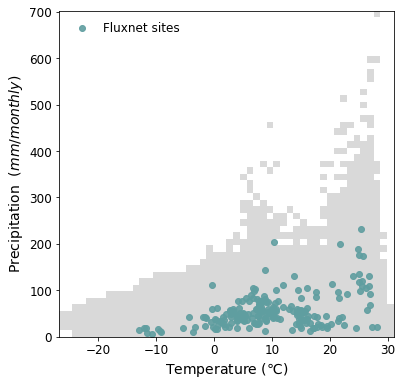

In [23]:
#画图
fig=plt.figure(figsize=(6,6))
plt.xlabel("Temperature ($℃$)",fontsize=14)
plt.ylabel("Precipitation  ($mm/monthly$)",fontsize=14)
plt.tick_params(labelsize=12)


h=plt.hist2d(x=df_PT_na.temperature, y=df_PT_na.precipitation, bins=50,vmin=0,vmax=1 ,cmap='gray_r',alpha=0.15)
plt.scatter(x=df.TA_F,y=df.P_SUM,marker='o',color='cadetblue',alpha=0.9,label='Fluxnet sites')

plt.legend(fontsize = 12,loc=2,frameon=False,borderaxespad = 0.5)
plt.savefig("folder/图/1.空间图补充.jpg",dpi=300, bbox_inches='tight' )
plt.show()